# Complete Guide to Understanding Skews and Distributions

This notebook will go into in-depth explanation for various tranformations we apply to our data, when these tranformations are necessary, with decent math to support the arguments.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

## Normalisation, Standardisation and manual Re-Scaling
Normalisation and Standardisation are methods to rescale features to a similar range. This is a very important step in gradient descent and distance based algorithms like linear regression, Neural Networks, clustering algorithms etc because the incremental change (delta-x) determines the strength of the slope. If feature A ranges between -100 to 2000 and feature B ranges between 3 to 7, the model will give more preference/weight to feature A **just** because the feature value (xi) is part of the gradient descent equation. 

![](gradiant_descent.jpg)

### Standardisation
To overcome this, we bring down all features to a common scale. In **Standardisation** techniques like z-tranform, we make the distribution to have a mean 0 and standard-deviation 1.
![](ztranform.png)

### Normalisation
min-max norm brings the range down to 0-1. The max extremum can never be more than 1 and min extremum can never be less than 0. 
![](minmax.png)




First, we'll create a dummy dataset with an outlier to compare these two tranformations. 

In [3]:
testd1 = np.random.randint(40, size=100)
testd2 = np.random.randint(5, size=100)
testnew = np.vstack((testd1, testd2))
norm = pd.DataFrame(testnew.transpose(), columns=['axis1', 'axis2'])
outlier = pd.DataFrame({"axis1": [80], "axis2":[3]})
final = norm.append(outlier, ignore_index = True)

This is the original data distribution

<AxesSubplot:xlabel='axis1', ylabel='axis2'>

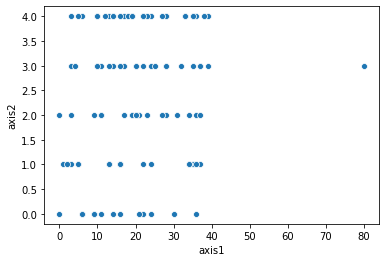

In [4]:
#original data dist
sns.scatterplot(x = final.axis1, y = final.axis2)

After application of a min-max scaling, the data distribution changes. Observe the scales on X and Y axes. 

In [5]:
#minmax normalisation
def minmaxnorm(x):
    return ((x - x.min())/(x.max() - x.min()))

#Z transform "standardisation"
def ztransform(x):
    return (x - x.mean())/x.std()

<AxesSubplot:xlabel='axis1', ylabel='axis2'>

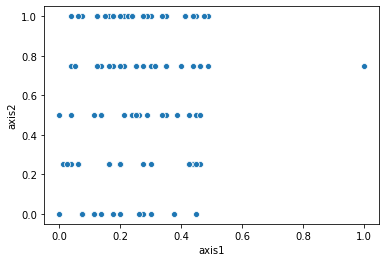

In [6]:
#min-max scaling
sns.scatterplot(x = minmaxnorm(final.axis1), y = minmaxnorm(final.axis2))

Now we apply z-tranform and observe the changes. 

<AxesSubplot:xlabel='axis1', ylabel='axis2'>

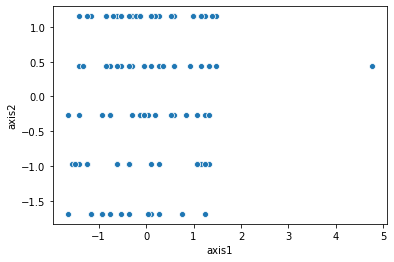

In [8]:
#min-max scaling
sns.scatterplot(x = ztransform(final.axis1), y = ztransform(final.axis2))

### Couple of observations
1. For min-max scaling the scale on the x-axis is from 0-1 whereas on y-axis its from 0-0.45ish, with the outlier at 1.0. 
2. For z-transform, the scale isn't between 0-1, but both x-axis and y-axis range between -1.5 to 1.5, with the outlier outside the range.

### Why did this happen? 
It's pretty evident in the formula itself. min-max scaling using the extremums of the data for rescaling the data between 0-1. These extremums are easily affected by the outliers, which change the scaling factor in the denominator. This isn't a problem with z-transform, which rescales it with the help of standard deviation, which doesn't bring the range between 0-1, but makes sure that outliers don't affect it, as outliers have little effect on the standard deviation, which is a collective measure. 

### When to use what? 

It depends on the application use case. Standardisation is advisable to use when the distribution has outliers, as the re-scaling factor doesn't depend on extremums. Standardisation also makes sense when you know that your data is a a guassian distribution, as we are using the mean and SD. Standardisation is commonly used for various statistical tests which require data to be centered at 0.

Min-max scaling makes more sense when the data has outliers or datapoints which lie relatively far away from the mean. It is also advisable to use min-max scaling when the goal is to bring all features down to a specific scale, like in image processing, rather than simply a common scale across all features, as we saw in the examples.
.  

## Skew Removal
Skewed data makes learning hard, as the skewed data can be interpreted as an imbalance in data/class distribution. As there is less data in the skewed tail when compared to the peak area, the model will be biased towards data points lying near the peak.

You need to remember that skew removal is for your algorithm to model it easily as a symmetric distribution. For making some sense about the data, you need to use the original skewed data again.  

